In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [420]:
df = pd.read_csv('IE_KPMG_Demand_Forecast_dataset.csv', delimiter=';')

df.head()

year_week  ID_material Units
0   2019-11    120010970   540
1   2019-12    120010970   750
2   2019-13    120010970   960
3   2019-14    120010970   720
4   2019-15    120010970  1620

In [421]:
# Assuming your DataFrame is named 'df'

# Convert the 'Units' column to string
df['Units'] = df['Units'].astype(str)

# Remove leading and trailing spaces in the 'Units' column
df['Units'] = df['Units'].str.strip()

# Convert the 'Units' column back to numeric
df['Units'] = pd.to_numeric(df['Units'], errors='coerce')

# Drop rows with NaN values in the 'Units' column
df = df.dropna(subset=['Units'])

# Verify the changes
print(df['Units'])


0        540.0
1        750.0
2        960.0
3        720.0
4       1620.0
         ...  
2852     948.0
2853     600.0
2854    1452.0
2855    1920.0
2856     276.0
Name: Units, Length: 2856, dtype: float64


In [422]:
df['year_week'] = pd.to_datetime(df['year_week'] + '-1', format='%Y-%W-%w')

In [423]:
df= df.sort_values('year_week')

In [424]:
df = df.rename(columns={'year_week': 'week'})

In [425]:
df['year'] = pd.to_datetime(df['week']).dt.year

In [426]:
df.dtypes

week           datetime64[ns]
ID_material             int64
Units                 float64
year                    int64
dtype: object

In [427]:
df['Units'] = pd.to_numeric(df['Units'], errors='coerce')

In [428]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [429]:
df.dtypes

week           datetime64[ns]
ID_material             int64
Units                 float64
year           datetime64[ns]
dtype: object

## EDA

#### Number of IDs

In [430]:
ID = df["ID_material"].unique()    #the ids

In [431]:
df["ID_material"].nunique()   # 14 unique ids

14

In [432]:
df["ID_material"].value_counts()   # how many items per ID (from the one more ordered to the less)

120004096    299
120014488    268
120014486    261
120009816    243
120015996    239
120009814    233
120010342    231
120010566    218
120010970    186
120011782    165
120011556    157
120012154    138
120012606    118
120015842    100
Name: ID_material, dtype: int64

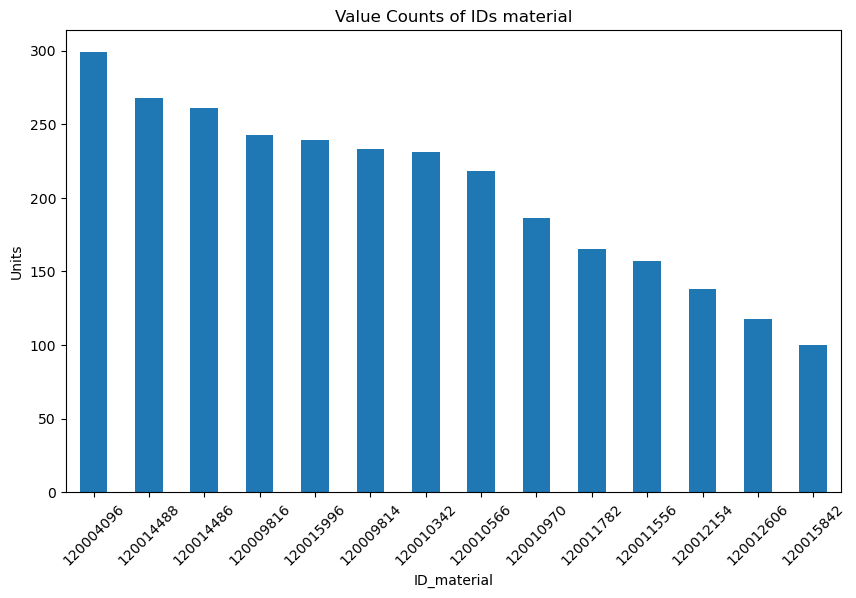

In [433]:
# with the data before, i just did a bar chart for maybe easier understanding 

value_counts = df["ID_material"].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')

#labels and title
plt.xlabel("ID_material")
plt.ylabel("Units")
plt.title("Value Counts of IDs material")

#rotate x-axis labels if needed
plt.xticks(rotation=45)

plt.show()

#### ISNA & ISNULL

NaN stands for "Not a Number." It is a special floating-point value used to represent missing or undefined values in numerical computations or data structures.

In [434]:
df.isna().mean()    
#It calculates the proportion of missing values (NaN or None) in each column of the DataFrame   

week           0.0
ID_material    0.0
Units          0.0
year           0.0
dtype: float64

In [435]:
df["Units"].isna().sum()   #so there is a missing value in the column "y" = units.

0

In [436]:
# isna: returns array with same shape with True/False to mask NaN
df[df["Units"].isna()]


#what to do with this value??? - check the space in the number of units.

Empty DataFrame
Columns: [week, ID_material, Units, year]
Index: []

In [437]:
descriptive_stats = df.groupby(["ID_material", "week"])["Units"].describe()
print(descriptive_stats)

                        count    mean  std     min     25%     50%     75%  \
ID_material week                                                             
120004096   2017-01-09    1.0   120.0  NaN   120.0   120.0   120.0   120.0   
            2017-01-16    1.0   120.0  NaN   120.0   120.0   120.0   120.0   
            2017-01-23    1.0   300.0  NaN   300.0   300.0   300.0   300.0   
            2017-01-30    1.0    60.0  NaN    60.0    60.0    60.0    60.0   
            2017-02-06    1.0   120.0  NaN   120.0   120.0   120.0   120.0   
...                       ...     ...  ...     ...     ...     ...     ...   
120015996   2022-08-29    1.0   948.0  NaN   948.0   948.0   948.0   948.0   
            2022-09-05    1.0   600.0  NaN   600.0   600.0   600.0   600.0   
            2022-09-12    1.0  1452.0  NaN  1452.0  1452.0  1452.0  1452.0   
            2022-09-19    1.0  1920.0  NaN  1920.0  1920.0  1920.0  1920.0   
            2022-09-26    1.0   276.0  NaN   276.0   276.0   276

In [438]:
descriptive_stats = df.groupby(["ID_material", "year"])["Units"].describe()
print(descriptive_stats)

#d. stats per product per year - graph for mean - 

                        count         mean         std    min     25%     50%  \
ID_material year                                                                
120004096   2017-01-01   51.0   101.176471   73.475086    0.0    60.0   120.0   
            2018-01-01   52.0    96.923077   86.626049    0.0     0.0   120.0   
            2019-01-01   52.0   106.153846   81.988853    0.0    60.0   120.0   
            2020-01-01   52.0   128.653846   97.518804    0.0    60.0   120.0   
            2021-01-01   53.0   135.283019   92.790164    0.0    60.0   140.0   
...                       ...          ...         ...    ...     ...     ...   
120015996   2018-01-01   44.0  1575.454545  927.848761    0.0  1029.0  1442.0   
            2019-01-01   51.0  1939.764706  922.413694  352.0  1286.0  1728.0   
            2020-01-01   52.0  1765.384615  879.241404  296.0  1260.0  1606.0   
            2021-01-01   53.0  1394.094340  706.285170   48.0   968.0  1432.0   
            2022-01-01   39.

### ACF & PACF

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


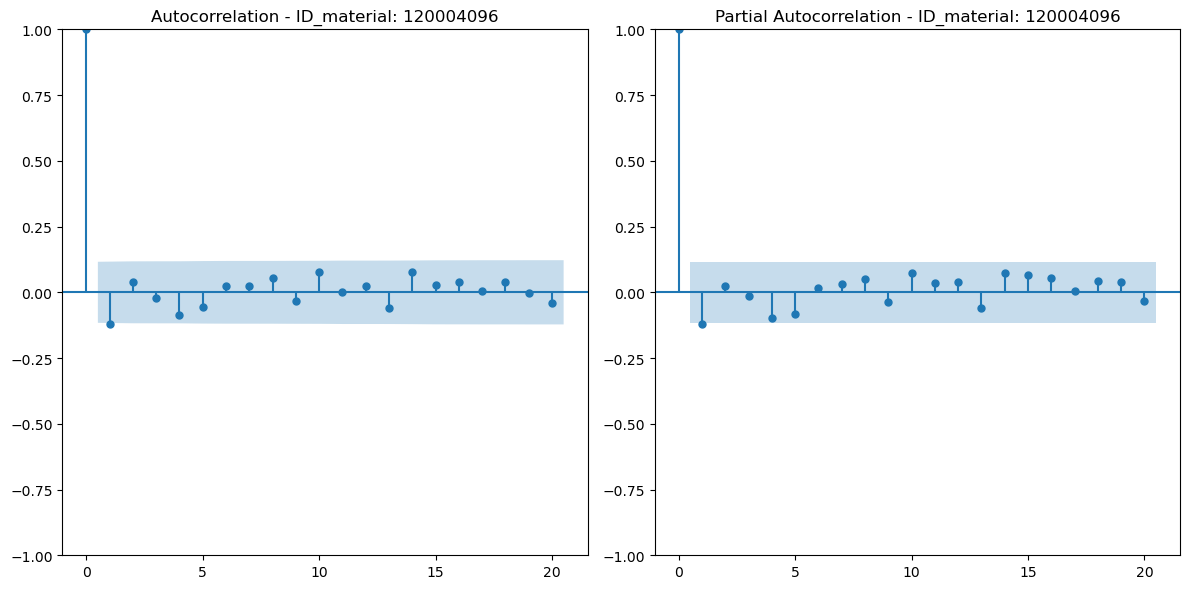

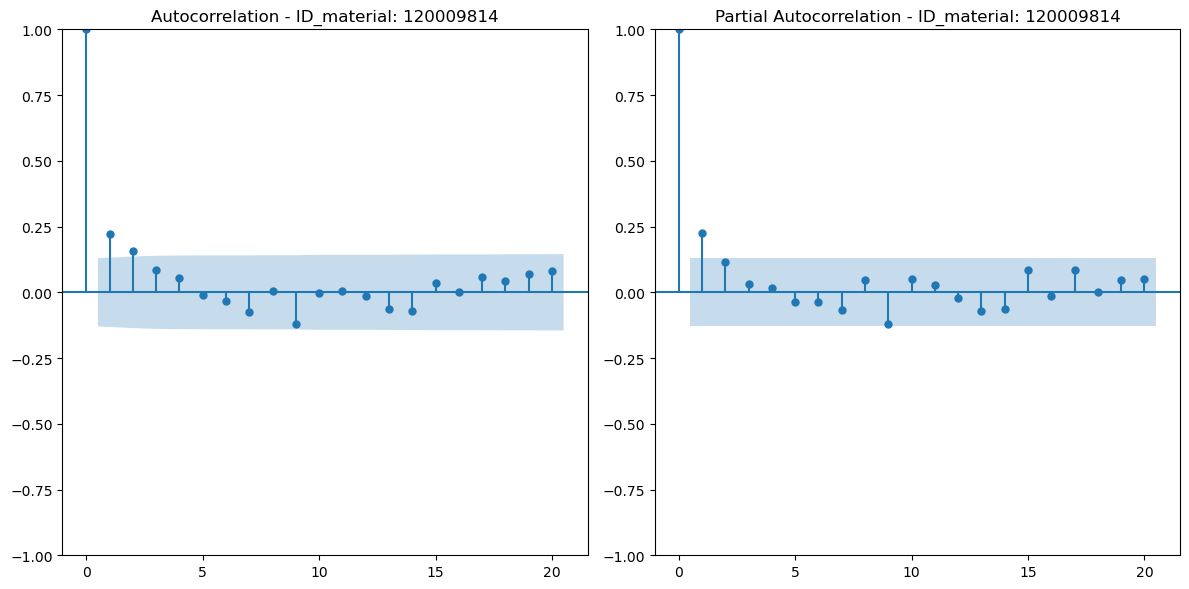

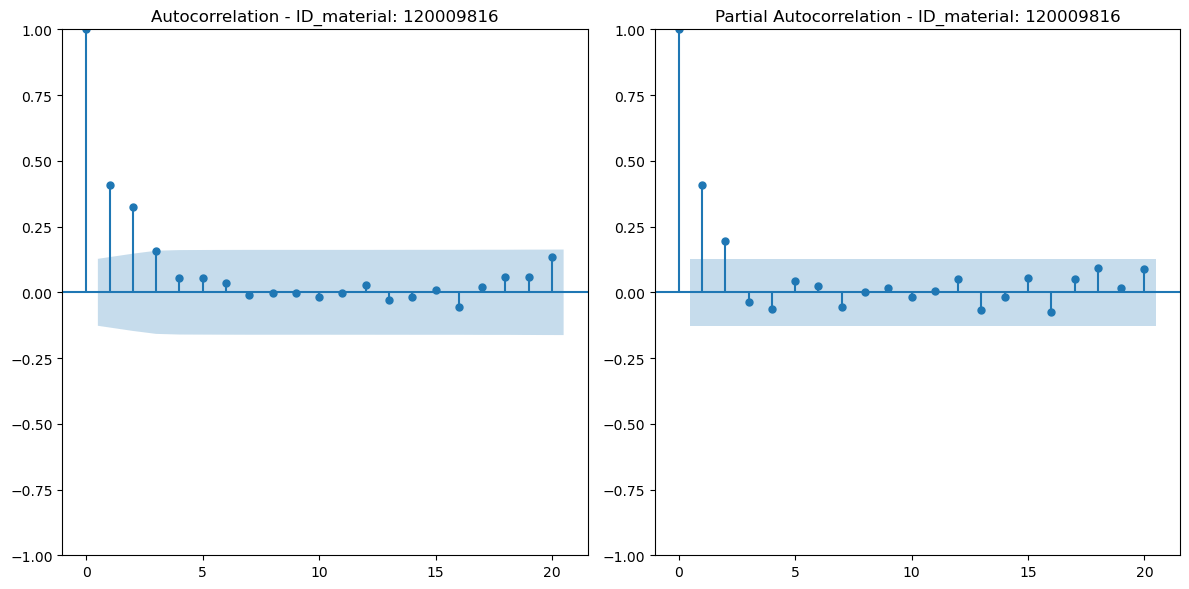

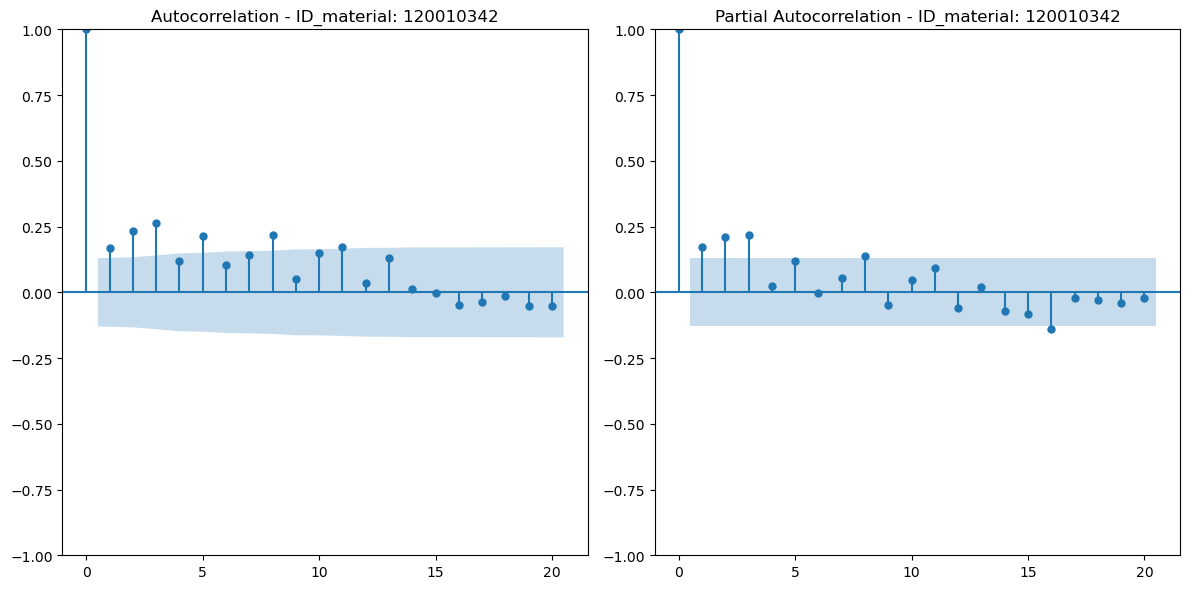

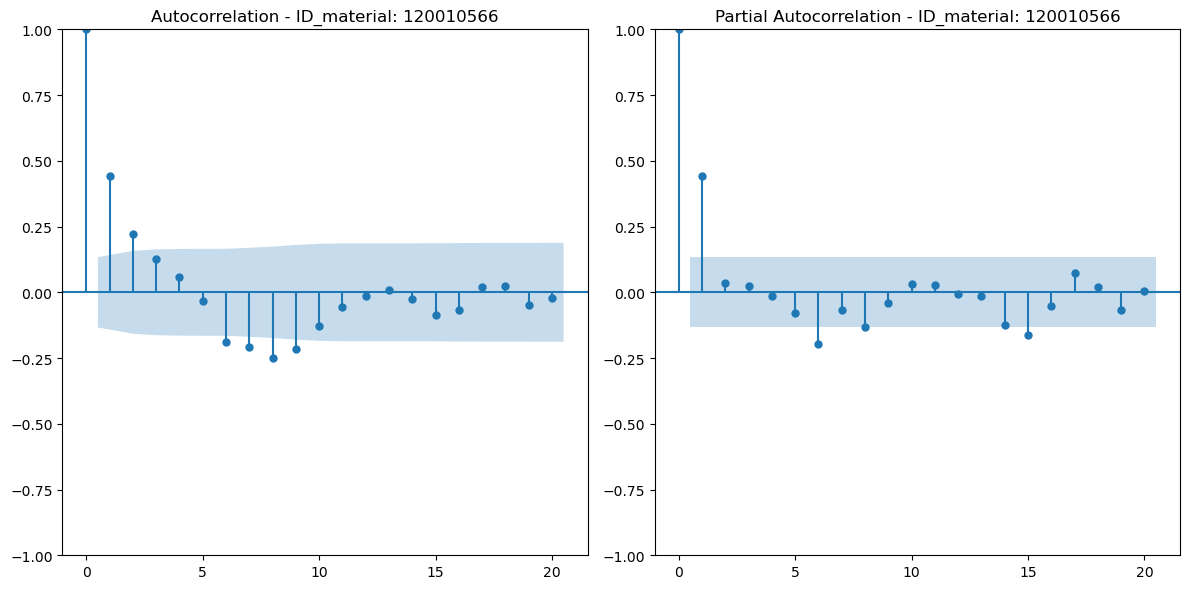

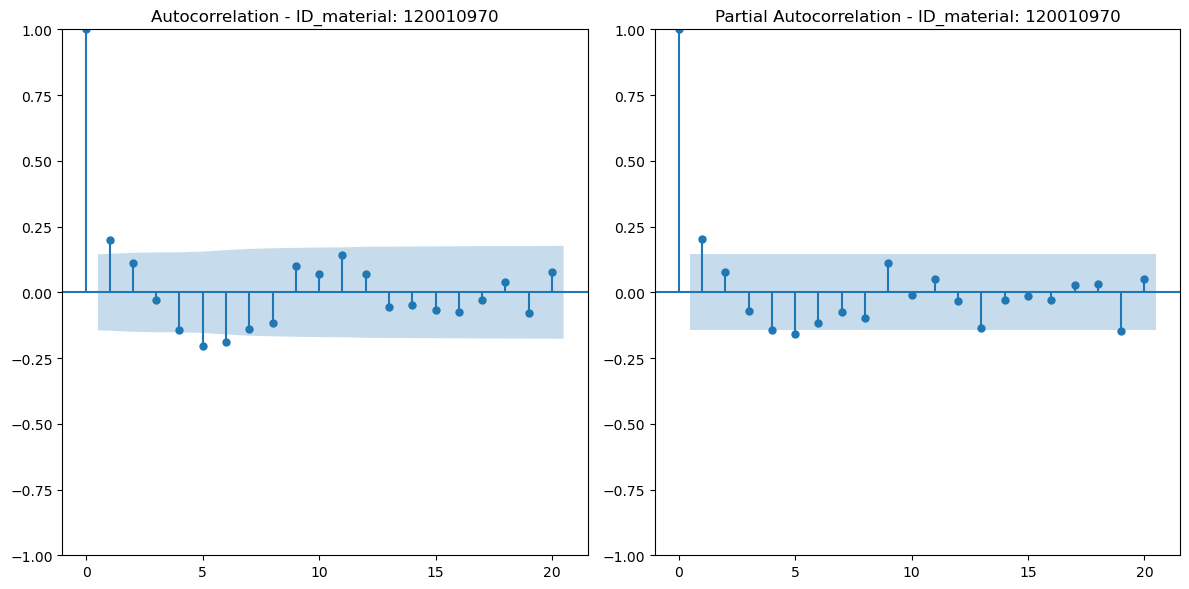

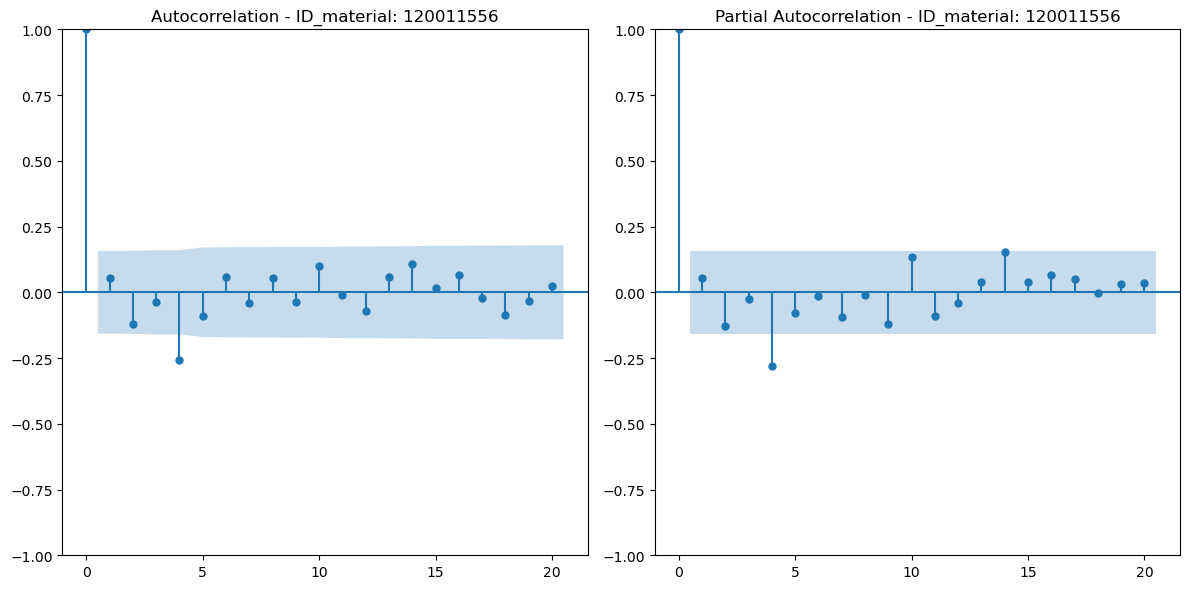

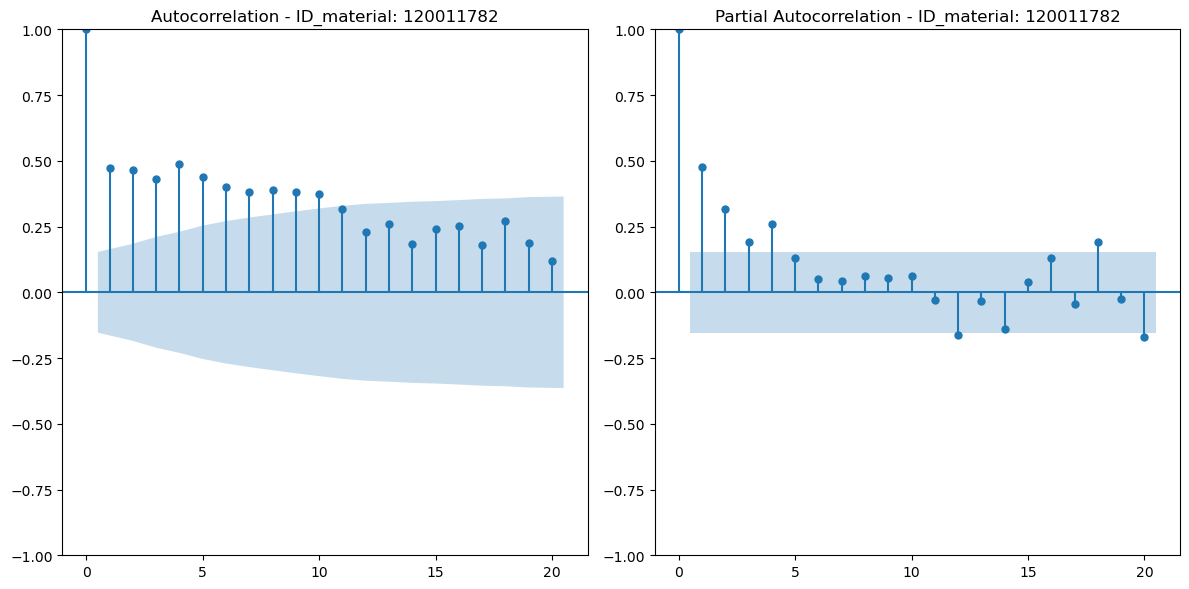

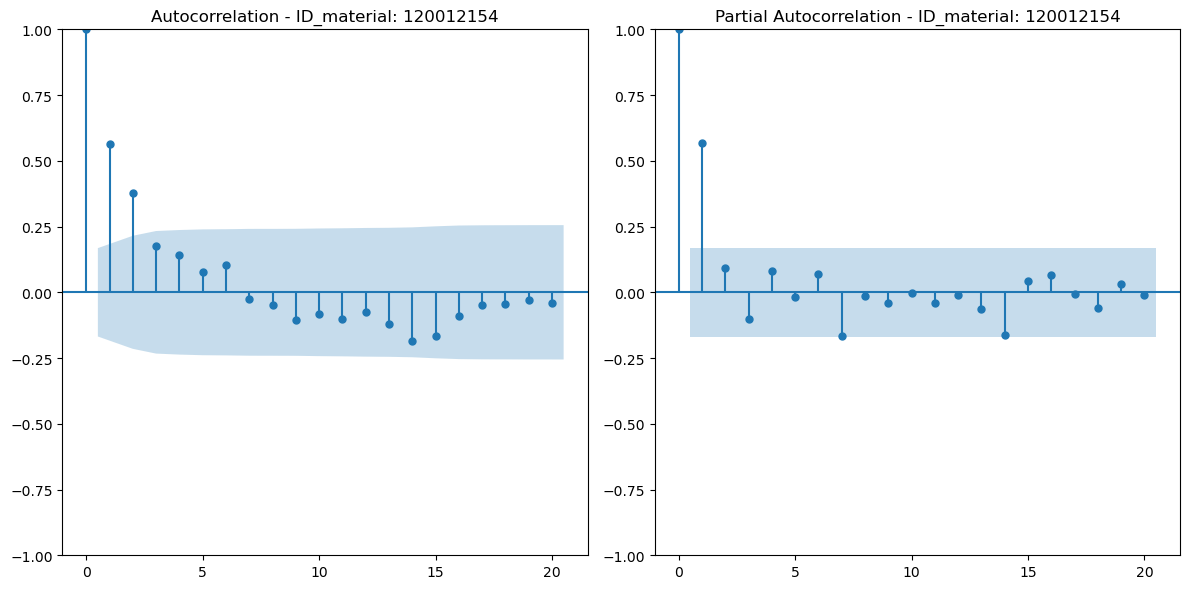

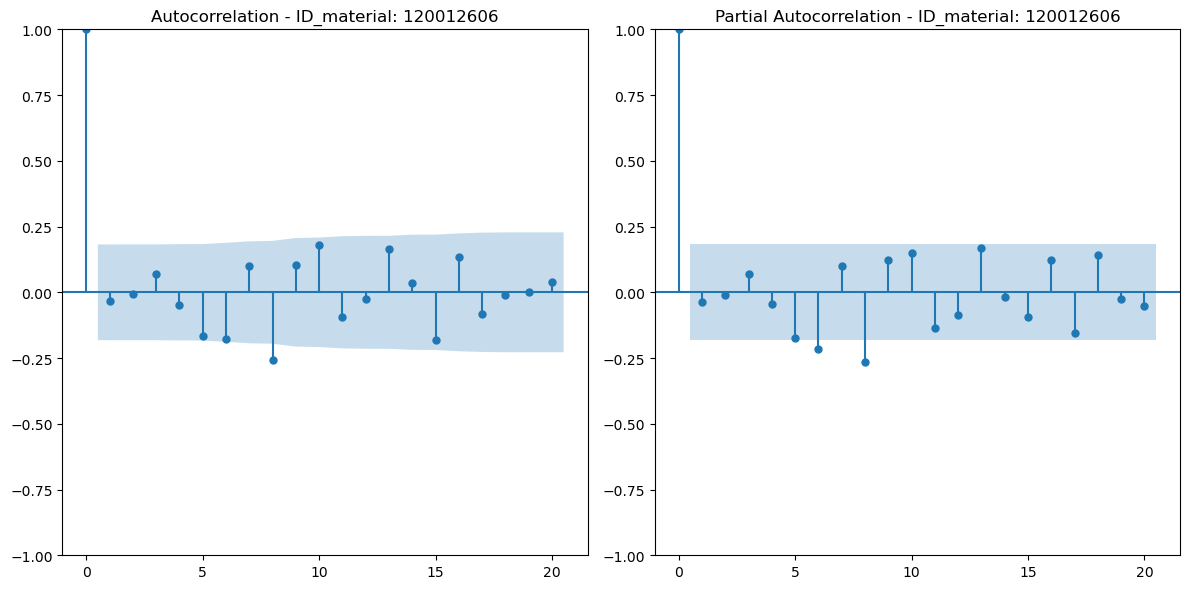

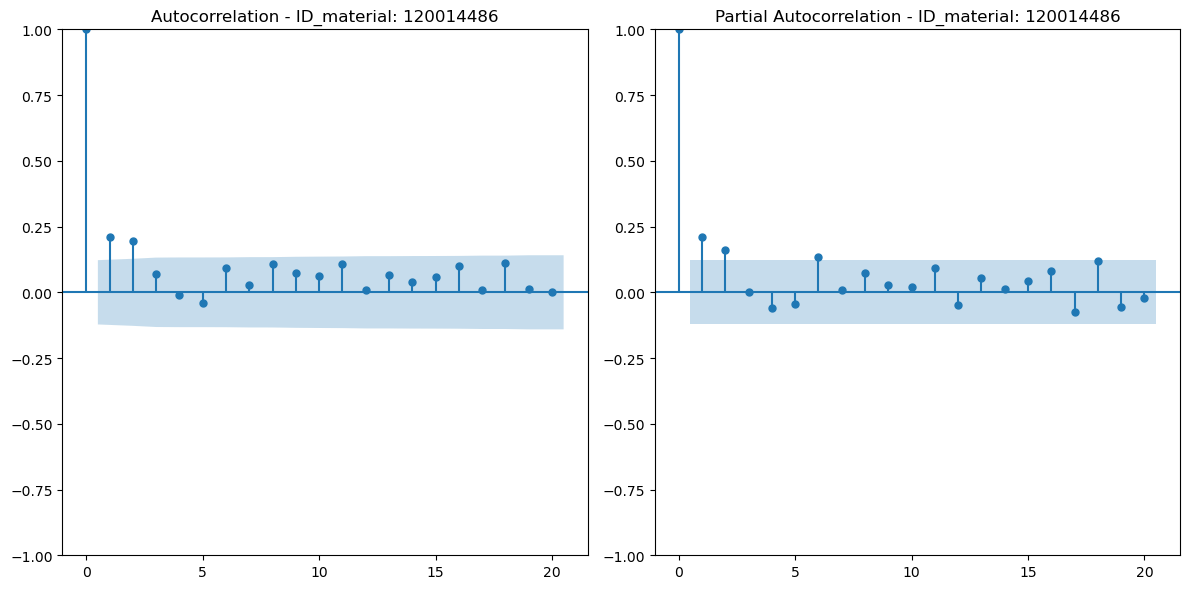

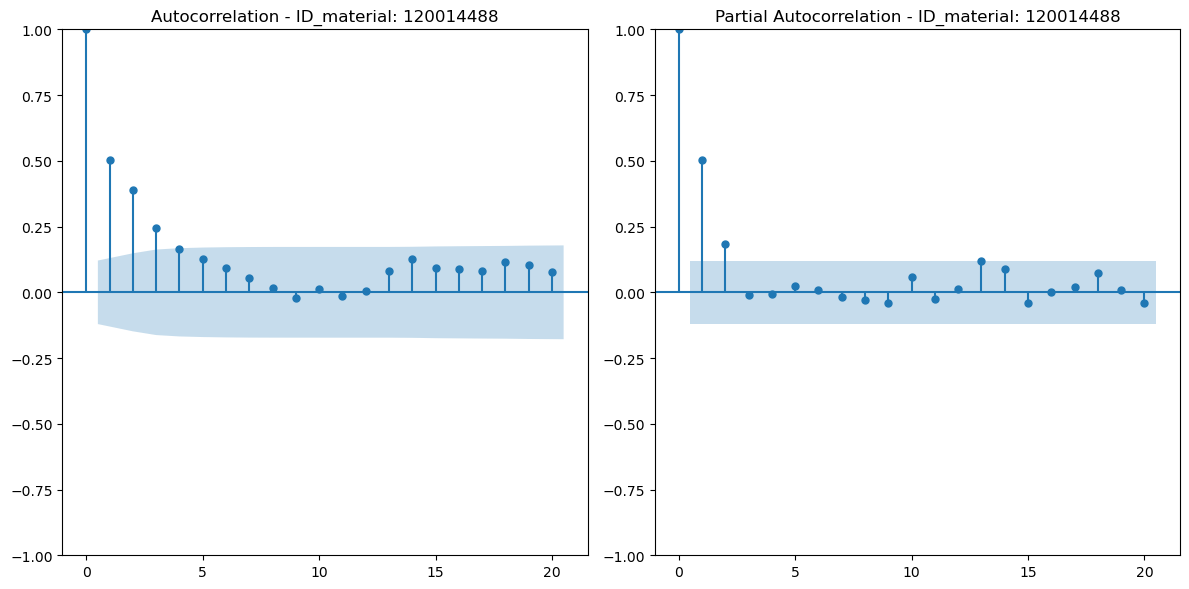

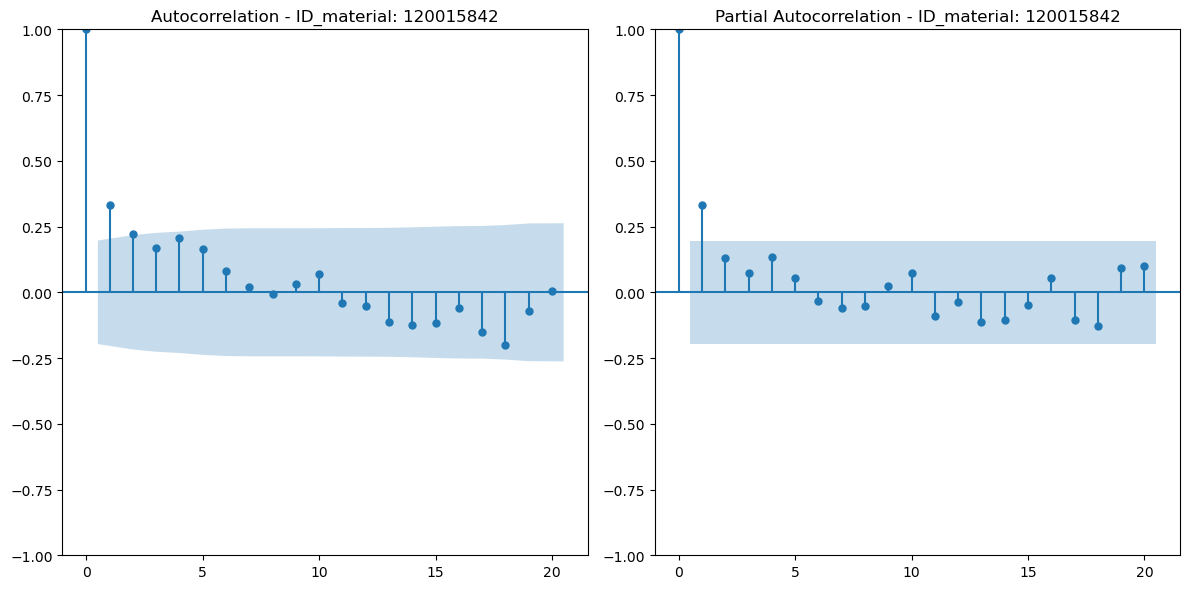

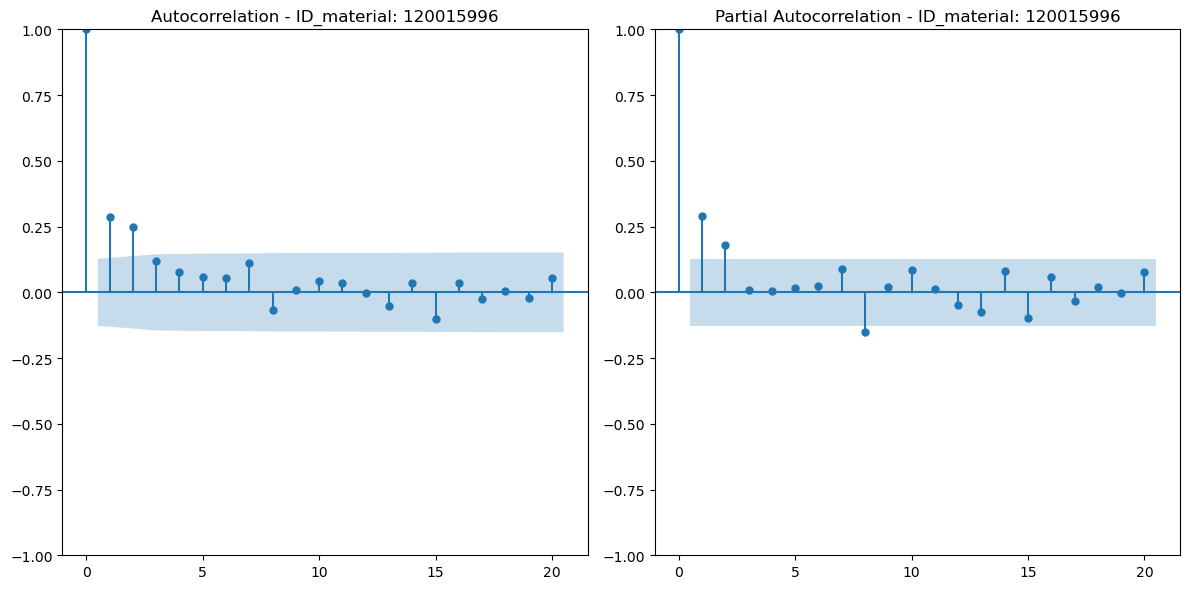

In [439]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Group the data by ID_material
grouped = df.groupby('ID_material')

# Iterate over each group
for group_name, group_data in grouped:
    # Preprocess data: remove missing values and outliers
    group_data = group_data.dropna()  # Remove rows with missing values
    group_data = group_data[group_data['Units'] < group_data['Units'].quantile(0.99)]  # Remove outliers above the 99th percentile

    # Autocorrelation and Partial Autocorrelation
    lag_acf = acf(group_data['Units'], nlags=20)
    lag_pacf = pacf(group_data['Units'], nlags=20, method='ywm')  # Use Yule-Walker method

    # Plot ACF
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(group_data['Units'], lags=20, ax=plt.gca())
    plt.title(f'Autocorrelation - ID_material: {group_name}')

    # Plot PACF
    plt.subplot(122)
    plot_pacf(group_data['Units'], lags=20, ax=plt.gca())
    plt.title(f'Partial Autocorrelation - ID_material: {group_name}')

    plt.tight_layout()
    plt.show()


### Stationarity

In [440]:
from statsmodels.tsa.stattools import adfuller

# Group the data by ID
grouped_data = df.groupby('ID_material')

# Iterate over each group
for group_name, group_data in grouped_data:
    print("ID Material:", group_name)
    
    # Perform stationarity test
    result = adfuller(group_data['Units'])
    
    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]
    
    # Print the test results
    print("ADF Test Statistic:", test_statistic)
    print("ADF p-value:", p_value)
    
    # Determine and print the stationarity conclusion
    if p_value < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")
    
    print("----------------------")


ID Material: 120004096
ADF Test Statistic: -20.34740640023659
ADF p-value: 0.0
The time series is stationary.
----------------------
ID Material: 120009814
ADF Test Statistic: -12.30394356529283
ADF p-value: 7.343405487684301e-23
The time series is stationary.
----------------------
ID Material: 120009816
ADF Test Statistic: -7.059894800742592
ADF p-value: 5.256759377201161e-10
The time series is stationary.
----------------------
ID Material: 120010342
ADF Test Statistic: -3.1721507114332783
ADF p-value: 0.021654365835578573
The time series is stationary.
----------------------
ID Material: 120010566
ADF Test Statistic: -5.6233071265467265
ADF p-value: 1.1321273776770555e-06
The time series is stationary.
----------------------
ID Material: 120010970
ADF Test Statistic: -6.833956691773249
ADF p-value: 1.862967438968719e-09
The time series is stationary.
----------------------
ID Material: 120011556
ADF Test Statistic: -9.823161300548561
ADF p-value: 5.2720545464501895e-17
The time ser

In [450]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'week' column to datetime
df['week'] = pd.to_datetime(df['week'])

# Set the 'week' column as the index
df.set_index('week', inplace=True)

# Iterate over each unique ID
for ID in df['ID_material'].unique():
    # Extract the time series data for the current ID
    ts = df[df['ID_material'] == ID]['Units']
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(ts, model='additive', period=52)  # Assuming 52 weeks in a year
    
    # Plot the decomposition components
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))
    ax[0].plot(ts, label='Original')
    ax[0].set_ylabel('Units')
    ax[0].set_title(f'Seasonal Decomposition - ID {ID}')
    ax[0].legend()
    ax[1].plot(decomposition.trend, label='Trend')
    ax[1].set_ylabel('Trend')
    ax[1].legend()
    ax[2].plot(decomposition.seasonal, label='Seasonality')
    ax[2].set_ylabel('Seasonality')
    ax[2].legend()
    ax[3].plot(decomposition.resid, label='Residuals')
    ax[3].set_ylabel('Residuals')
    ax[3].set_xlabel('Time')
    ax[3].legend()
    
    plt.tight_layout()
    plt.show()


KeyError: 'week'

In [443]:
!pip install sktime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 4.2 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'sktime.utils.data_processing'

In [445]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import ARIMA

In [446]:
df = df.set_index('year')

In [447]:
y_train, y_test = temporal_train_test_split(df['Units'], test_size=0.2)

In [451]:
model = ARIMA(order=(1, 1, 1))
model.fit(y_train)

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(order=(1, 1, 1))

In [449]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 7.5 MB/s eta 0:00:0000:0100:01


In [453]:
y_pred = model.predict(fh=10)  # forecasting 10 future periods


ValueError: _coerce_to_period requires freq argument to be passed if x is pd.Timestamp

### GroupBy and Aggregation

In [372]:
df[["ID_material"]].head()

ID_material
1381    120004096
1382    120004096
1383    120004096
1384    120004096
1385    120004096

In [373]:
df_IDs = df.groupby(["ID_material", "year"])[["Units"]].mean()

df_IDs.columns = [f"mean_{col}" for col in df.columns]

df_IDs

ValueError: Length mismatch: Expected axis has 1 elements, new values have 4 elements

In [374]:
import matplotlib.pyplot as plt

unique_ids = df["ID_material"].unique()

for id in unique_ids:
    subset_df = df[df["ID_material"] == id]
    subset_df.plot(x="year", y="mean_Units", kind="bar")
    plt.xlabel("Year")
    plt.ylabel("Mean Units")
    plt.title(f"Mean Units for ID {id}")
    plt.show()

KeyError: 'mean_Units'

In [376]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Assuming you have your data stored in a variable called 'df'

# Select the relevant columns for clustering
data = df[['Units']]

# Initialize lists to store the values of WCSS and silhouette score
wcss = []
silhouette_scores = []

# Define the range of cluster numbers to try
k_values = range(1, 10)

# Iterate over each cluster number
for k in k_values:
    # Initialize and fit the K-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)
    
    # Compute the silhouette score and append it to the list
    silhouette_scores.append(metrics.silhouette_score(data, kmeans.labels_))

# Plot the WCSS values
plt.plot(k_values, wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method - WCSS vs. Number of Clusters')
plt.show()

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method - Silhouette Score vs. Number of Clusters')
plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#df = df.rename(columns={'ID_material': 'unique_id', 'Units': 'y', 'year_week': 'ds'})

/Applications/anaconda3/lib/python3.9/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


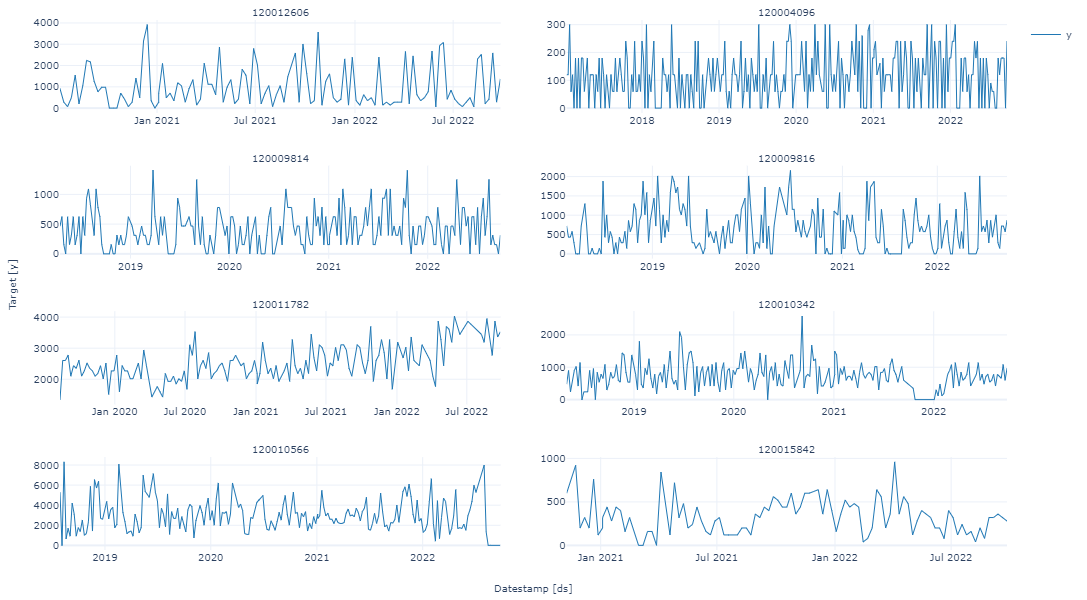

In [10]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

In [11]:
from statsforecast.models import (
    AutoARIMA,
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)


# Create a list of models and instantiation parameters
models = [
    AutoARIMA(season_length=24),
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]

In [12]:
sf = StatsForecast(
    df=df, 
    models=models,
    freq='W', 
    n_jobs=-1,
    fallback_model = SeasonalNaive(season_length=7)
)

In [13]:
forecasts_df = sf.forecast(h=8, level=[90])

forecasts_df.head()


ds   AutoARIMA  AutoARIMA-lo-90  AutoARIMA-hi-90  \
unique_id                                                            
120004096 2022-10-02   98.879623       -44.100891       241.860138   
120004096 2022-10-09  125.555779       -19.379553       270.491119   
120004096 2022-10-16  120.513153       -24.631294       265.657593   
120004096 2022-10-23  121.466370       -23.689636       266.622375   
120004096 2022-10-30  121.286179       -23.899952       266.472321   

           HoltWinters  HoltWinters-lo-90  HoltWinters-hi-90  CrostonClassic  \
unique_id                                                                      
120004096        180.0        -112.870514         472.870514      114.753853   
120004096        120.0        -172.870514         412.870514      114.753853   
120004096        180.0        -112.870514         472.870514      114.753853   
120004096        180.0        -112.870514         472.870514      114.753853   
120004096        180.0        -112.870514         472.870514      114.753853   

           SeasonalNaive  SeasonalNaive-lo-90  SeasonalNaive-hi-90  \
unique_id                                                            
120004096          120.0           -84.214935           324.214935   
120004096          240.0            35.785069           444.214935   
120004096          180.0           -24.214933           384.214935   
120004096          240.0            35.785069           444.214935   
120004096            0.0          -204.214935           204.214935   

           HistoricAverage  HistoricAverage-lo-90  HistoricAverage-hi-90  \
unique_id                                                                  
120004096       114.280937             -30.833893             259.395752   
120004096       114.280937             -30.833893             259.395752   
120004096       114.280937             -30.833893             259.395752   
120004096       114.280937             -30.833893             259.395752   
120004096       114.280937             -30.833893             259.395752   

           DynamicOptimizedTheta  DynamicOptimizedTheta-lo-90  \
unique_id                                                       
120004096             118.118317                   -16.637192   
120004096             118.118317                   -37.103882   
120004096             118.118317                   -67.718353   
120004096             118.118317                   -36.193432   
120004096             118.118317                   -11.670474   

           DynamicOptimizedTheta-hi-90  
unique_id                               
120004096                   288.087921  
120004096                   245.618423  
120004096                   260.332642  
120004096                   245.281921  
120004096                   276.540558

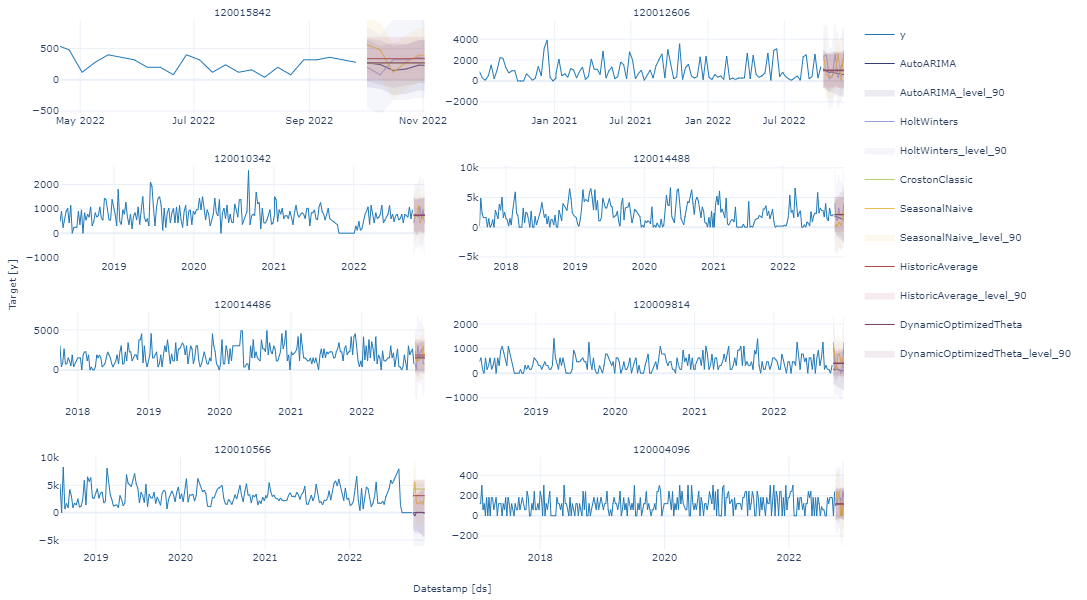

In [14]:
sf.plot(df,forecasts_df)

In [15]:
!pip install pandas_profiling 
from pandas_profiling import ProfileReport

profile = ProfileReport(df, tsmode=True, sortby="unique_id")
profile.to_file('profile_report.html')

/var/folders/hn/dl1w7bfj0jqdp4xck_3qz0dw0000gn/T/ipykernel_1837/1210965809.py:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
profile

In [26]:
df = df.groupby('unique_id')

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'